<a href="https://colab.research.google.com/github/Dominik-Lamcha/Optimization_algorithms/blob/main/GPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lib import**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import arange
from numpy import meshgrid
import sympy as smp
import scipy
from scipy.misc import derivative
import datetime
from statistics import mean
import time



**Definition of function**

In [ ]:
def Rastrigin(X):
    A = 10
    return A*len(X) + sum([(x*x - A * np.cos(2 * math.pi * x)) for x in X])

def Sphere(X):
    return sum([(x*x) for x in X])

def Rosenbrock(X):
   sum=0
   n=len(X)
   for i in range(n-1):
    sum=sum+(100.0*(X[i+1] - X[i]**2.0)**2.0 + ((1 - X[i])**2.0))
   return sum

In [ ]:
def rastrigin(*X):
    A = 10
    n=len(X)
    f = A*n + sum([(x*x - A * np.cos(2 * math.pi * x)) for x in X])
    return f

def sphere(*X):
    return sum([(x*x) for x in X])
    
def rosenbrock(*X):
   sum=0
   n=len(X)
   for i in range(n-1):
    sum=sum+(100.0*(X[i+1] - X[i]**2.0)**2.0 + ((1 - X[i])**2.0))
   return sum

**Optimizer**

In [ ]:
def GPS(f,x0,alpha,D,epsilon,max_iter,gamma=0.5):
    y = f(x0)
    x = x0
    iter = 0
    solutions = np.array([])

    start_time = time.time()

    while alpha > epsilon and iter<max_iter:
      improved = False
      if iter == 0:
        solutions = np.array(x)
      else:
        solutions = np.vstack([solutions, x])
      for i,d in enumerate(D):
        x1 = x + alpha*d
        y1 = f(x1)
        if y1 < y:
          x = x1
          y = y1
          improved = True
          #print('D')
          #print(D)
          D = np.delete(D,i,axis=0)
          #print(D)
          D=np.insert(D, 0,d,axis=0)
          #print(D)

          break
      if not improved:
        alpha = alpha*gamma
      iter=iter+1

    an_array = np.array(solutions)

    array_length = len(an_array)
    last_element = an_array[array_length - 1]

    
    solution=last_element

    stop_time=time.time()

    algorithm_time=stop_time-start_time
 
    return algorithm_time,solution

**Main**

In [ ]:
max_iters = 10000
lr = 0.001 
alpha= 4
epsilon = 1e-10
D0 = np.array([[1, 0], [-1, 0], [0, -1], [0, 1]])


alg_time_1 = [[0]*5 for i in range(11)] 
alg_time_2 = [[0]*5 for i in range(11)]
alg_time_3 = [[0]*5 for i in range(11)]
best_result_1 = [[0] for i in range(11)]
mean_1 = [[0] for i in range(11)]
best_result_x1 = [[0] for i in range(11)]
best_result_2 = [[0] for i in range(11)]
mean_2 = [[0] for i in range(11)]
best_result_x2 = [[0] for i in range(11)]
best_result_3 = [[0] for i in range(11)]
mean_3 = [[0] for i in range(11)]
best_result_x3 = [[0] for i in range(11)]

for xi in range(11):
  xn=2**(xi+1) 
  f1_celu = [] 
  f2_celu = []
  f3_celu = []
  print(xn)
  
  
  x0 = np.array([])
  D0_2 = np.array([])
  for i in range(xn):
      if i%2:
           D0_2 = np.append(D0_2,1)
      else:
          D0_2 = np.append(D0_2, -1)
  D0 = np.array([np.ones(xn), -1*np.ones(xn), D0_2,-D0_2])


  for i in range(5):
    start_x = np.random.uniform(0,1,xn) 
    time_1 = 0
    time_2 = 0
    time_3 = 0

    x_1 = 0
    x_2 = 0
    x_3 = 0


    
    alg_time_1[xi][i],x_1=GPS( Rastrigin,start_x,alpha,D0, epsilon, max_iters, lr)
    alg_time_2[xi][i],x_2=GPS( Sphere,start_x,alpha,D0, epsilon, max_iters, lr)
    alg_time_3[xi][i],x_3=GPS( Rosenbrock,start_x,alpha,D0, epsilon, max_iters, lr)
    if i<1:
      all_x1 = x_1
      all_x2 = x_2
      all_x3 = x_3
    else:
      all_x1 = np.vstack((all_x1, x_1)) 
      all_x2 = np.vstack((all_x2, x_2))
      all_x3 = np.vstack((all_x3, x_3))

    f1_celu.append(Rastrigin(x_1)) 
    f2_celu.append(Sphere(x_2))
    f3_celu.append(Rosenbrock(x_3))
  best_result_1[xi] = min(f1_celu) 
  mean_1[xi] = mean(np.array(f1_celu)) 
  best_result_x1[xi] = all_x1[f1_celu.index(best_result_1[xi]),:] 


  best_result_2[xi] = min(f2_celu)
  mean_2[xi] = mean(np.array(f2_celu))
  best_result_x2[xi] = all_x2[f2_celu.index(best_result_2[xi]),:]

  best_result_3[xi] = min(f3_celu)
  mean_3[xi] = mean(np.array(f3_celu))
  best_result_x3[xi] = all_x3[f3_celu.index(best_result_3[xi]),:]



2
4
8
16
32
64
128
256
512
1024
2048


**Results draw**

In [ ]:
def gps_draw(f,func,resolution):

    gamma=0.5
    max_iter = 20
    lr = 0.001 
    alpha= 3
    epsilon = 1e-10
    D = np.array([[1, 0], [-1, 0], [0, -1], [0, 1]])
    # x0= np.random.uniform(0,1,2)/3 
    x0=[10,10]
    y=0
    y = f(x0)
    x = x0
    iter = 0
    solutions = np.array([])

    start_time = time.time()

    while alpha > epsilon and iter<max_iter:
      improved = False
      if iter == 0:
        solutions = np.array(x)
      else:
        solutions = np.vstack([solutions, x])
      for i,d in enumerate(D):
        x1 = x + alpha*d
        y1 = f(x1)
        if y1 < y:
          x = x1
          y = y1
          improved = True
          #print('D')
          #print(D)
          D = np.delete(D,i,axis=0)
          #print(D)
          D=np.insert(D, 0,d,axis=0)
          #print(D)

          break
      if not improved:
        alpha = alpha*gamma
      iter=iter+1
      plt.scatter(x[0], x[1])



    X = np.linspace(-20, 20, 200)    
    Y = np.linspace(-20, 20, 200)    
    X, Y = np.meshgrid(X, Y)
    Z = func(X, Y)
    Z = np.array(Z)
    Z = Z.reshape((len(X), len(Y)))
    plt.contour(X,Y,Z, resolution)
    plt.show()

    

    

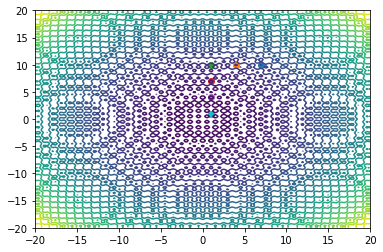

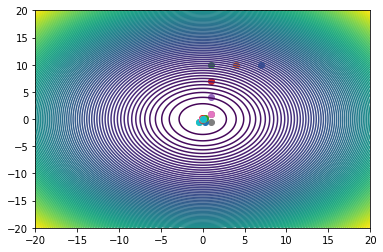

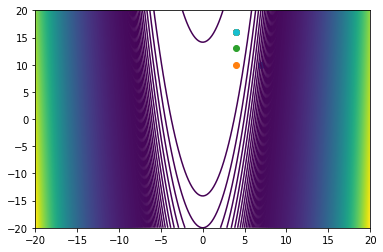

In [ ]:
gps_draw(Rastrigin,rastrigin,30)
gps_draw(Sphere,sphere,100)
gps_draw(Rosenbrock,rosenbrock,1000)

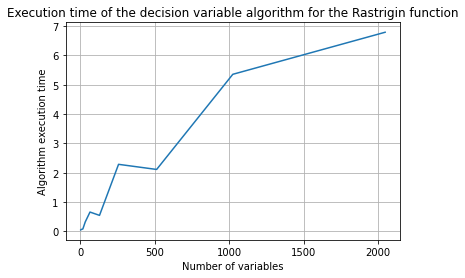

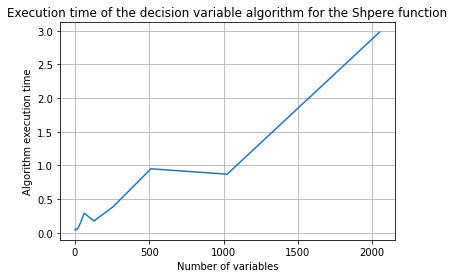

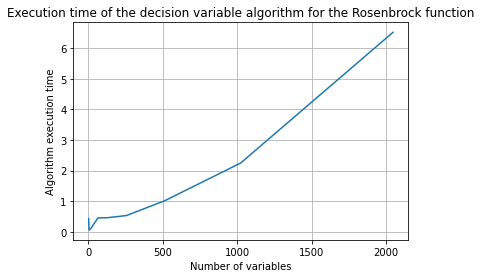

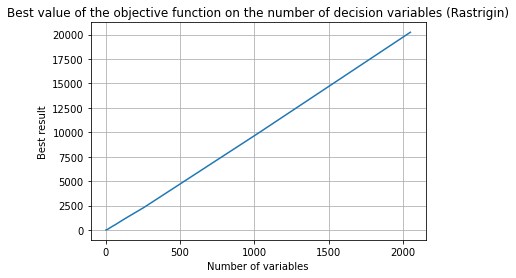

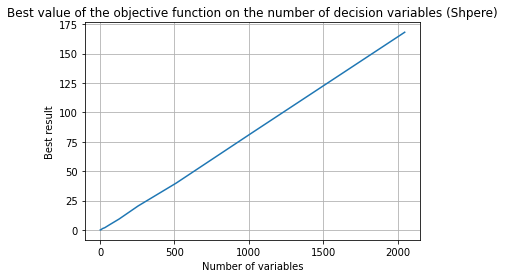

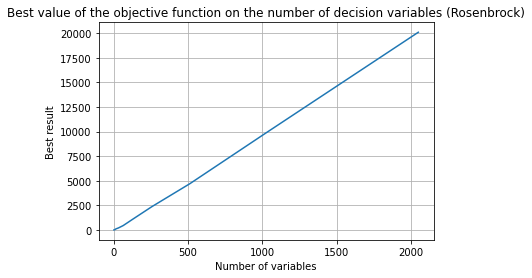

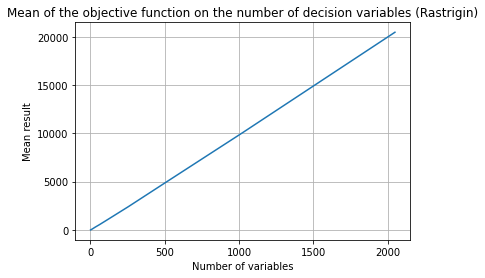

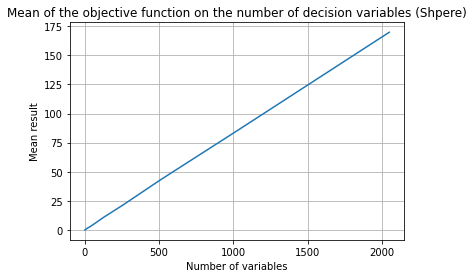

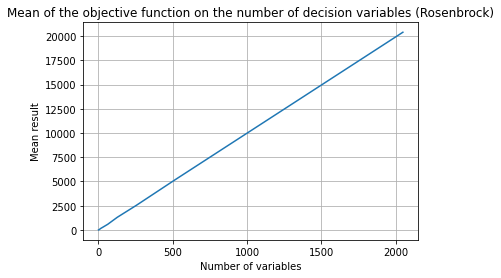

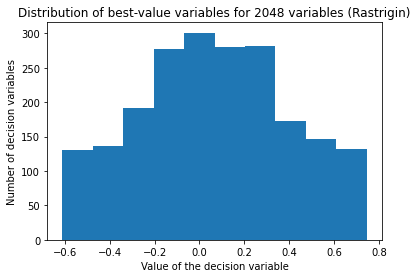

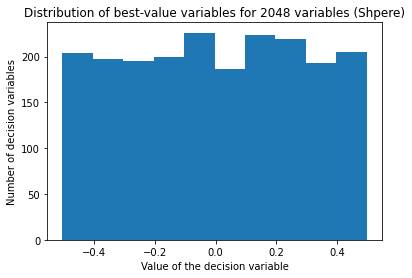

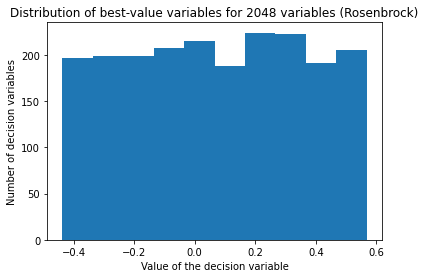

In [ ]:

mean_time_1=[[0] for i in range(11)]
mean_time_2=[[0] for i in range(11)]
mean_time_3=[[0] for i in range(11)]
for j in range(11):
  temp_sum_1=0
  temp_sum_2=0
  temp_sum_3=0
  for i in range(5):
    temp_sum_1=temp_sum_1+alg_time_1[j][i]
    temp_sum_2=temp_sum_2+alg_time_2[j][i]
    temp_sum_3=temp_sum_3+alg_time_3[j][i]
  mean_time_1[j]=temp_sum_1/5
  mean_time_2[j]=temp_sum_2/5
  mean_time_3[j]=temp_sum_3/5

hist1 = best_result_x1[10]
hist2 = best_result_x2[10]
hist3 = best_result_x3[10]

os_x=[[2**(i+1)] for i in range(11)]
plt.plot(os_x,mean_time_1)
plt.ylabel('Algorithm execution time')
plt.xlabel('Number of variables')
plt.title('Execution time of the decision variable algorithm for the Rastrigin function')
plt.grid()
plt.show()

plt.plot(os_x,mean_time_2)
plt.ylabel('Algorithm execution time')
plt.xlabel('Number of variables')
plt.title('Execution time of the decision variable algorithm for the Shpere function')
plt.grid()
plt.show()

plt.plot(os_x,mean_time_3)
plt.ylabel('Algorithm execution time')
plt.xlabel('Number of variables')
plt.title('Execution time of the decision variable algorithm for the Rosenbrock function')
plt.grid()
plt.show()

plt.plot(os_x,best_result_1)
plt.ylabel('Best result')
plt.xlabel('Number of variables')
plt.title('Best value of the objective function on the number of decision variables (Rastrigin)')
plt.grid()
plt.show()
plt.plot(os_x,best_result_2)
plt.ylabel('Best result')
plt.xlabel('Number of variables')
plt.title('Best value of the objective function on the number of decision variables (Shpere)')
plt.grid()
plt.show()
plt.plot(os_x,best_result_3)
plt.ylabel('Best result')
plt.xlabel('Number of variables')
plt.title('Best value of the objective function on the number of decision variables (Rosenbrock)')
plt.grid()
plt.show()

plt.plot(os_x,mean_1)
plt.ylabel('Mean result')
plt.xlabel('Number of variables')
plt.title('Mean of the objective function on the number of decision variables (Rastrigin)')
plt.grid()
plt.show()
plt.plot(os_x,mean_2)
plt.ylabel('Mean result')
plt.xlabel('Number of variables')
plt.title('Mean of the objective function on the number of decision variables (Shpere)')
plt.grid()
plt.show()
plt.plot(os_x,mean_3)
plt.ylabel('Mean result')
plt.xlabel('Number of variables')
plt.title('Mean of the objective function on the number of decision variables (Rosenbrock)')
plt.grid()
plt.show()

plt.hist(hist1)
plt.ylabel('Number of decision variables')
plt.xlabel('Value of the decision variable')
plt.title('Distribution of best-value variables for 2048 variables (Rastrigin)')
plt.show()
plt.hist(hist2)
plt.ylabel('Number of decision variables')
plt.xlabel('Value of the decision variable')
plt.title('Distribution of best-value variables for 2048 variables (Shpere)')
plt.show()
plt.hist(hist3)
plt.ylabel('Number of decision variables')
plt.xlabel('Value of the decision variable')
plt.title('Distribution of best-value variables for 2048 variables (Rosenbrock)')
plt.show()

lr = 0.01
beta1 = 0.9
beta2 = 0.99
max_iters = 10000

